# Simulating MIMIC Patient
We used Pulse to simulate patients in MIMIC, initializing them using their readings in MIMIC, and administering IV fluids and vasopressors at each time step as done in MIMIC. (See [MIMICSimulator.py](https://gitlab.kitware.com/faaizT/engine/-/blob/local-changes/src/python/pulse/rlengine/SimulationEngine.py) for more details about the simulations.)  
This note compares a patient in MIMIC with their simulated counterpart. 

In [1]:
import pandas as pd
icustayid = 1006.0
export_dir = "/data/localhost/taufiq/export-dir/"
mimic_csv = "/data/localhost/taufiq/Pulse/engine/src/python/pulse/rlengine/resources/MIMICtable-1hourly_entire-stay.csv"

In [2]:
simulation = pd.read_csv(export_dir + "simulation_" + str(icustayid) + "_final_1613274021.csv")
simulation = simulation.replace(r"[\[|\]]", "", regex=True)

In [3]:
simulation.head()

,ArterialPressure (mmHg),BloodVolume (mL),Carina - CarbonDioxide - PartialPressure (mmHg),CoreTemperature (degC),DiastolicArterialPressure (mmHg),EndTidalCarbonDioxidePressure (mmHg),HeartRate (1/min),Lead3ElectricPotential (mV),MeanArterialPressure (mmHg),OxygenSaturation (None),RespirationRate (1/min),SimulationTime(s),SystolicArterialPressure (mmHg),time
0,74.66450526855601,4917.978472760195,14.633293884806704,37.03546061197983,68.40678107610306,33.28586302929822,74.99999999999996,0.04999999999999938,83.7739341724525,0.9743250149341743,18.987341772151932,0.0,96.84806363488552,4.330306e+09
1,105.52465290770701,5991.0347057502395,0.5478831808574116,37.241356865919556,61.97314583193669,33.65264368109973,57.692307692307665,0.17499999999999982,86.80574740957927,0.9751918031250787,19.8675496688742,36000.00000010506,106.27808542116456,4.330342e+09
2,84.36699397454268,6694.587101732265,33.69526632077312,37.2357544064954,53.41811093153724,33.74853749618413,45.454545454545425,0.0,83.98776512021337,0.9752820633730359,19.8675496688742,71999.99999669408,109.49886703935084,4.330378e+09
3,109.77634261942715,6760.425681804711,33.92038290755432,37.23511879108406,61.15184847536049,33.62379191839124,48.38709677419352,0.0,90.18419385600127,0.9753157252947247,20.00000000000003,75599.9999974275,116.16687138323397,4.330382e+09
4,100.40912774827144,6824.6364429937785,16.011008403359686,37.23468060446555,52.7525051977045,33.744107668745116,41.66666666666664,0.0,82.57820821462263,0.9752721990490723,19.8675496688742,79199.99999816091,109.98894149887161,4.330385e+09


In [4]:
len(simulation)

61

In [5]:
MIMICtable = pd.read_csv(mimic_csv)
MIMICtable.head()


,bloc,icustay_id,charttime,gender,age,elixhauser,re_admission,died_in_hosp,died_within_48h_of_out_time,mortality_90d,...,Shock_Index,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_1hourly,output_total,output_1hourly,cumulated_balance,sepsis
0,1.0,1006.0,4.330306e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.750000,206.000000,0.0,0.0,0.0,0.0,8166.0,4083.0,-8166.0,1.0
1,11.0,1006.0,4.330342e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.750000,206.000000,0.0,0.0,0.0,0.0,12249.0,4083.0,-12249.0,1.0
2,21.0,1006.0,4.330378e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.831461,240.000000,0.0,0.0,0.0,0.0,16332.0,4083.0,-16332.0,1.0
3,22.0,1006.0,4.330382e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.955357,96.000000,0.0,0.0,0.0,0.0,20415.0,4083.0,-20415.0,1.0
4,23.0,1006.0,4.330385e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.812749,109.714286,0.0,0.0,175.0,175.0,24298.0,3883.0,-24123.0,1.0


In [6]:
MIMICtable_filtered = MIMICtable[MIMICtable['icustay_id']==icustayid]
len(MIMICtable_filtered)

61

In [7]:
MIMICtable_filtered.head()

,bloc,icustay_id,charttime,gender,age,elixhauser,re_admission,died_in_hosp,died_within_48h_of_out_time,mortality_90d,...,Shock_Index,PaO2_FiO2,median_dose_vaso,max_dose_vaso,input_total,input_1hourly,output_total,output_1hourly,cumulated_balance,sepsis
0,1.0,1006.0,4.330306e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.750000,206.000000,0.0,0.0,0.0,0.0,8166.0,4083.0,-8166.0,1.0
1,11.0,1006.0,4.330342e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.750000,206.000000,0.0,0.0,0.0,0.0,12249.0,4083.0,-12249.0,1.0
2,21.0,1006.0,4.330378e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.831461,240.000000,0.0,0.0,0.0,0.0,16332.0,4083.0,-16332.0,1.0
3,22.0,1006.0,4.330382e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.955357,96.000000,0.0,0.0,0.0,0.0,20415.0,4083.0,-20415.0,1.0
4,23.0,1006.0,4.330385e+09,0.0,25154.170995,3.0,0.0,1.0,1.0,1.0,...,0.812749,109.714286,0.0,0.0,175.0,175.0,24298.0,3883.0,-24123.0,1.0


In [8]:
time = MIMICtable_filtered['charttime']
diaBP_pulse = simulation['DiastolicArterialPressure (mmHg)']
diaBP_mimic = MIMICtable_filtered['DiaBP']

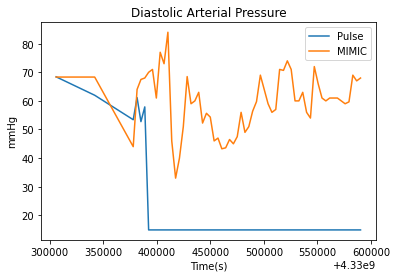

In [9]:
import matplotlib.pyplot as plt
plt.plot(time, pd.to_numeric(diaBP_pulse))
plt.plot(time, diaBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Diastolic Arterial Pressure')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

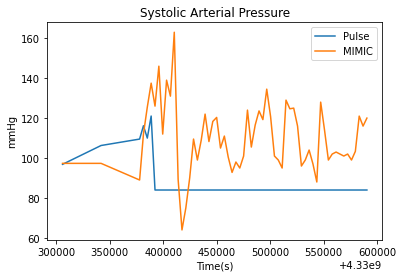

In [10]:
sysBP_pulse = simulation['SystolicArterialPressure (mmHg)']
sysBP_mimic = MIMICtable_filtered['SysBP']
plt.plot(time, pd.to_numeric(sysBP_pulse))
plt.plot(time, sysBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Systolic Arterial Pressure')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

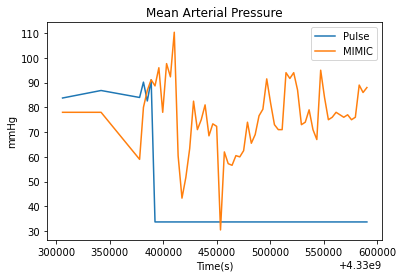

In [11]:
meanBP_pulse = simulation['MeanArterialPressure (mmHg)']
meanBP_mimic = MIMICtable_filtered['MeanBP']
plt.plot(time, pd.to_numeric(meanBP_pulse))
plt.plot(time, meanBP_mimic)
plt.xlabel('Time(s)')
plt.ylabel('mmHg')
plt.title('Mean Arterial Pressure')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

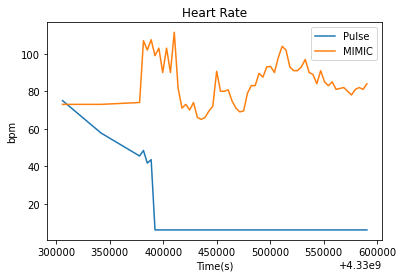

In [12]:
HR_pulse = simulation['HeartRate (1/min)']
HR_mimic = MIMICtable_filtered['HR']
plt.plot(time, pd.to_numeric(HR_pulse))
plt.plot(time, HR_mimic)
plt.xlabel('Time(s)')
plt.ylabel('bpm')
plt.title('Heart Rate')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

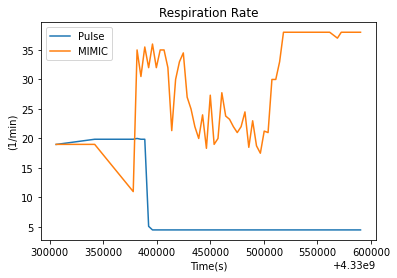

In [13]:
RR_pulse = simulation['RespirationRate (1/min)']
RR_mimic = MIMICtable_filtered['RR']
plt.plot(time, pd.to_numeric(RR_pulse))
plt.plot(time, RR_mimic)
plt.xlabel('Time(s)')
plt.ylabel('(1/min)')
plt.title('Respiration Rate')
plt.legend(['Pulse', 'MIMIC'])
plt.show()

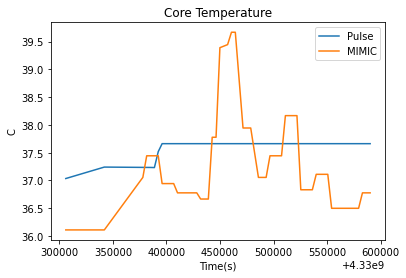

In [14]:
temp_pulse = simulation['CoreTemperature (degC)']
temp_mimic = MIMICtable_filtered['Temp_C']
plt.plot(time, pd.to_numeric(temp_pulse))
plt.plot(time, temp_mimic)
plt.xlabel('Time(s)')
plt.ylabel('C')
plt.title('Core Temperature')
plt.legend(['Pulse', 'MIMIC'])
plt.show()